In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')

In [36]:
df= pd.read_csv('merged.csv')

In [37]:
def integizer(string):
    for i in string:
        if i == '':
            return None
        else:
            return int(i)

def dolcomma(col):
    return pd.to_numeric(col.map(lambda x: x.replace(',', '').replace('$','')), downcast='integer')

def floatizer(string):
    for i in string:
        if i == '':
            return None
        else:
            continue
    return float(string)

In [38]:
#Cleaning up monetary columns and converting to integer
df['Assessment Improvement Improved']=dolcomma(df['Assessment Land'])
df['Most Recent Sale Price Improved'] =dolcomma(df['Most Recent Sale Price'])
df['Square Footage Improved'] = dolcomma(df['Square Footage'])
df['Improvement Value Improved']= dolcomma(df['Improvement Value'])
df['Assessment Total Improved']= dolcomma(df['Assessment Total'])
df['Land Value Improved']=dolcomma(df['Land Value'])
df['Assessment Land Improved']=dolcomma(df['Assessment Land'])
df['Total Appraisal Value Improved']=dolcomma(df['Total Appraisal Value'])

In [39]:
#Cleaning up certain date columns
df['Most Recent Sale Date']=pd.to_datetime(df['Most Recent Sale Date'])
df['Sale Date']=pd.to_datetime(df['Sale Date'])
#Converting 'Land Area' column to clean float
df['Land Area Acres'] = df['Land Area'].map(lambda x: x.replace(' ','').replace('Acres', '')).map(lambda x: float(x))
#Neighborhood column is all numbers, but it's categorical.
df.Neighborhood = df.Neighborhood.map(lambda x: str(x))

In [40]:
#Need to convert this to numeric. Split-level = 1.5, 1.75 story= 1.5
df['Story Height Improved'] = df['Story Height'].astype(str).map(lambda x: x.replace('STY', '').replace('STORY','').replace(' ', '').replace('TWO', '2').replace('ONE', '1'))
df['Story Height Improved']=df['Story Height Improved'].map(lambda x: x.replace('THREE', '3').replace('SPLIT-LEVEL','1.5').replace('BI-LEVEL', '2')).replace('1.75','1.5')
df['Story Height Improved']=df['Story Height Improved'].map(lambda x: float(x))

In [41]:
#All apartments and multifamily I am listing as "condo"
df['Building Type']= df['Building Type'].replace('HIGHRISE APT', 'CONDO').replace('APARTMENT', 'CONDO').replace('HRISE CONDO', 'CONDO').replace('RESD CONDO', 'CONDO')
#Combining single-family residential
df['Building Type']=df['Building Type'].replace('RW SING FAM', 'SINGLE FAM').replace('RZ SING FAM', 'SINGLE FAM').replace('RH SING FAM', 'SINGLE FAM').replace('RY SING FAM', 'SINGLE FAM').replace('MODULAR HOME', 'SINGLE FAM').replace('SING FAM', 'SINGLE FAM')
#Combining all townhomes up to quadplexes
df['Building Type']=df['Building Type'].replace('RESD TRIPLEX', 'PLEX').replace('RESD QUADPLX', 'PLEX').replace('R1 DUPLEX', 'PLEX').replace('RES DUPLEX', 'PLEX')
#Combining "third places"
df['Building Type']=df['Building Type'].replace('LODGE/FRAT\'L', 'THIRD').replace('CHURCH', 'THIRD')
#Combining commercial
df['Building Type']=df['Building Type'].replace('HEALTH CLUB', 'COMM').replace('GROCERY/SMKT', 'COMM').replace('RETAIL/SHPG', 'COMM').replace('DAYCARE', 'COMM').replace('MARKET', 'COMM').replace('REST/BAR', 'COMM')
df['Building Type']=df['Building Type'].replace('OFFICE', 'COMM').replace('WAREHOUSE', 'COMM')

In [42]:
#Want to create a new column which is the mean sale price per square foot of a parcel in that neighborhood
column = df.groupby('Neighborhood').mean()
column['Mean PPS'] = column['Sale Price'] / column['Square Footage Improved']
column['Mean PPS']=column['Mean PPS'].replace(np.inf, np.nan)

In [43]:
meansales = pd.DataFrame(column['Mean PPS'])
df=df.merge(meansales,how = 'left', on = 'Neighborhood')

In [50]:
# Indexing by date.
df = df.set_index('Most Recent Sale Date')

In [65]:
year = df['Sale Date'].dt.year
month = df['Sale Date'].dt.month
monthlymean = df['Sale Price'].groupby([year, month]).resample('M').mean()
yearlymean= df['Sale Price'].groupby([year]).mean()

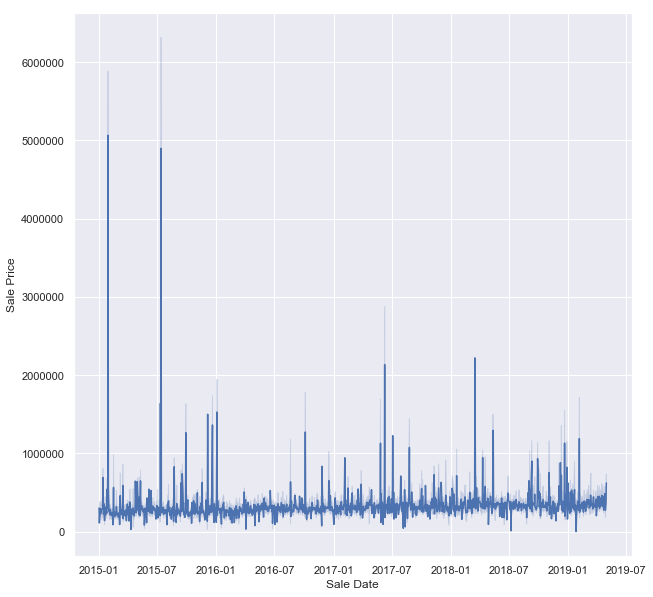

In [66]:
plt.figure(figsize=(10,10))
sns.lineplot(x=df['Sale Date'],y=df['Sale Price'],data=monthlymean, legend=False)

In [19]:
index = pd.date_range(start="2015-01-01", periods=36, freq="M")
idf = pd.DataFrame(df[['Sale Price', 'Sale Date', 'Zone']],index=index)
monthly = idf.mean()
monthly.head()
#monthly['Sale Price'].plot()

Sale Price   NaN
Sale Date    NaN
Zone         NaN
dtype: float64

In [76]:
#df = df.set_index('Sale Date')
plt.figure(figsize=(10,10))
weekly=df['Sale Price'].resample('W').mean()
monthlyprice = df['Sale Price'].resample('M').mean()
rollingmean= df['Sale Price'].rolling(window=30, center=True).mean()

monthly=df['Sale Price'].resample('M').mean()
df['Month']= df['Sale Date'].dt.month
sns.lmplot(x= df.Month, y = monthly, data=df)

#monthlyprice.plot()

ValueError: Can only compare identically-labeled Series objects

<Figure size 720x720 with 0 Axes>